# Single analysis notebook

This notebook aims to create enviroment to simply test strategies developed in Stocks & Loss system for python

In [16]:
# imports 
from scraper import stock_daily
from analyzer import Analyzer
from IPython.display import display

import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Settings
* Select stock ticker
* Define buy and sell strategy (buystrat and sellstrat)
* Define if you want to run stop loss and what value
* Same with profit taker

In [17]:
ticker = "SFT"

buystrat = ["Mcstoch_ut1", "Mcstoch_ut2", "Mcstoch_ut3", "Mcstoch_ut4", "Mcstoch_dt1"]
sellstrat = ['Mcstoch']

sl = True
slval = 0.05

pt = False
ptval = 0.08

rb = True

## Run calculation

In [18]:
# scraping / loading data
stock = stock_daily(ticker, save=False)
# creating analyzer instance
trades = Analyzer(ticker=ticker, data=stock.data)
# building strategy
trades.strategy(buyStrategy=buystrat, sellStrategy=sellstrat,
    stopLoss=sl ,stopLossValue=slval, profitTaker=pt, profitTakerValue=ptval, repeated_buys=rb)
# evaluating strategy
summary = trades.profit(capitalForEachTrade=200, comission=2)
profitByHolding = 100*((trades.data["Close"].iloc[-1]-trades.data["Close"].iloc[0])/trades.data["Close"].iloc[0])

# dates for plot
# taking stock.data and changing index to column and Date to index
dates = stock.data.copy()
dates["index1"] = dates.index
dates = dates.set_index("Date")

# find index of buy dates of good trades
bdg = summary["Buy date"].where(summary["Good trade?"].astype("bool")).dropna().to_numpy()
sdg = summary["Sell date"].where(summary["Good trade?"].astype("bool")).dropna().to_numpy()
bdg = dates["index1"].reindex(bdg).to_numpy()
sdg = dates["index1"].reindex(sdg).to_numpy()
   
# find index of buy dates of bad trades
bdb = summary["Buy date"].where(~summary["Good trade?"].astype("bool")).dropna().to_numpy()
sdb = summary["Sell date"].where(~summary["Good trade?"].astype("bool")).dropna().to_numpy()
bdb = dates["index1"].reindex(bdb).to_numpy()
sdb = dates["index1"].reindex(sdb).to_numpy()

0      33.0
1      44.0
2      44.0
3      60.0
4     111.0
5     111.0
6     131.0
7     147.0
8     164.0
9     200.0
10    237.0
11    244.0
12    244.0
Name: Sell, dtype: float64


In [19]:
print('Absolute profit last year:                ',np.round(summary["Profit[$]"].sum(),2),'$')
print('Relative profit last year:                ',np.round(summary["Profit[%]"].sum(),2),'%')
print('Relative profit by holding last year:     ',np.round(profitByHolding,2),'%')

Absolute profit last year:                 -189.26 $
Relative profit last year:                 -94.63 %
Relative profit by holding last year:      -27.41 %


In [20]:
display(summary)

,Buy date,Buy price,Buy value,Position,Sell date,Sell price,Sell value,Comission,Good trade?,Profit[%],Profit[$]
0,2020-09-01,13.98,200,14.306152,2020-09-10,12.85,183.834060,2,0.0,-9.082970,-18.165940
1,2020-09-22,12.67,200,15.785320,2020-09-25,11.98,189.108121,2,0.0,-6.445939,-12.891879
2,2020-09-24,11.85,200,16.877637,2020-09-25,11.98,202.194079,2,1.0,0.097039,0.194079
3,2020-10-13,11.98,200,16.694491,2020-10-19,10.72,178.964953,2,0.0,-11.517524,-23.035047
4,2020-12-07,9.47,200,21.119324,2020-12-31,8.27,174.656816,2,0.0,-13.671592,-27.343184
5,2020-12-22,9.43,200,21.208907,2020-12-31,8.27,175.397671,2,0.0,-13.301164,-26.602329
6,2021-01-25,8.86,200,22.573364,2021-02-01,8.12,183.295716,2,0.0,-9.352142,-18.704284
7,2021-02-08,9.80,200,20.408163,2021-02-24,9.37,191.224484,2,0.0,-5.387758,-10.775516
8,2021-03-11,9.55,200,20.942408,2021-03-19,8.82,184.712032,2,0.0,-8.643984,-17.287968
9,2021-04-27,8.40,200,23.809525,2021-05-11,7.79,185.476198,2,0.0,-8.261901,-16.523802


## Visualizations

Successful trades are showcased as a light green fill, similarly, failed trades as a red fill

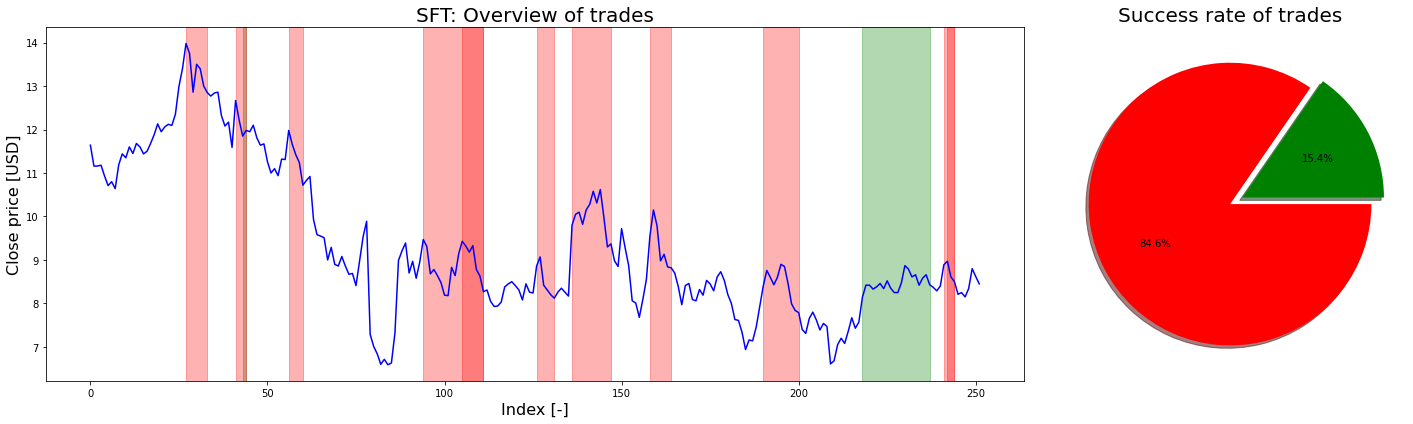

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(20,6), gridspec_kw={'width_ratios': [2.5, 1]})

# plot closed prices and highlighted trades
ax[0].plot(stock.data["Close"], color="b")
for i, val in enumerate(bdg):
    ax[0].axvspan(val, sdg[i], alpha=0.3, color="g")
for i, val in enumerate(bdb):
    ax[0].axvspan(val, sdb[i], alpha=0.3, color="r")
ax[0].set_title(ticker + ": Overview of trades", fontsize=20)
ax[0].set_ylabel("Close price [USD]", fontsize=16)
ax[0].set_xlabel("Index [-]", fontsize=16)

gtrades = summary["Good trade?"].sum()
trades = summary["Good trade?"].size
# plot piechart with percentage of succesful trades (profit / loss)
ax[1].pie([gtrades, trades-gtrades], colors=["g","r"], shadow=True, explode=(0.1, 0), autopct="%1.1f%%")
ax[1].set_title("Success rate of trades", fontsize=20)

fig.tight_layout()